# Drips

This example identifies which repos from the Dependency Graph have been targeted by Drips splits. View the full data dump [here](https://docs.google.com/spreadsheets/d/1xQ4SfHikMprlAbBfh1ptA9Zm8gqcJdqcaDVY35d9Xp8/edit?usp=sharing).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_graph = pd.read_csv('../../graph/unweighted_graph.csv')
df_graph['package_repo_owner_name'] = df_graph['package_repo_owner'] + '/' + df_graph['package_repo_name']
nodes = set(df_graph['package_repo_owner_name'])
len(nodes)

4289

In [3]:
df_drips = pd.read_csv('../../datasets/drips/Drips Data Dump 10.12.2024 - GitProjects.csv')
df_drips['name'] = df_drips['name'].str.lower()
drip_repos = set(df_drips['name'])
len(drip_repos)

515

In [4]:
len(drip_repos.intersection(nodes))

73

In [5]:
dff_graph = df_graph[df_graph['package_repo_owner_name'].isin(drip_repos)]
dff_graph

,seed_repo_owner,seed_repo_name,package_name,package_repo_owner,package_repo_name,package_source,package_repo_owner_name
22,ethereum,web3.py,requests,psf,requests,PIP,psf/requests
73,paradigmxyz,reth,tokio-macros,tokio-rs,tokio,RUST,tokio-rs/tokio
78,paradigmxyz,reth,tokio-util,tokio-rs,tokio,RUST,tokio-rs/tokio
144,paradigmxyz,reth,futures,rust-lang,futures-rs,RUST,rust-lang/futures-rs
164,paradigmxyz,reth,lazy_static,rust-lang-nursery,lazy-static.rs,RUST,rust-lang-nursery/lazy-static.rs
...,...,...,...,...,...,...,...
13450,ethereumjs,ethereumjs-monorepo,ethers,ethers-io,ethers.js,NPM,ethers-io/ethers.js
13460,ethereumjs,ethereumjs-monorepo,@typescript-eslint/types,typescript-eslint,typescript-eslint,NPM,typescript-eslint/typescript-eslint
13505,ethereumjs,ethereumjs-monorepo,prettier,prettier,prettier,NPM,prettier/prettier
13516,ethereumjs,ethereumjs-monorepo,@typescript-eslint/utils,typescript-eslint,typescript-eslint,NPM,typescript-eslint/typescript-eslint


Text(0, 0.5, 'Package Dependency')

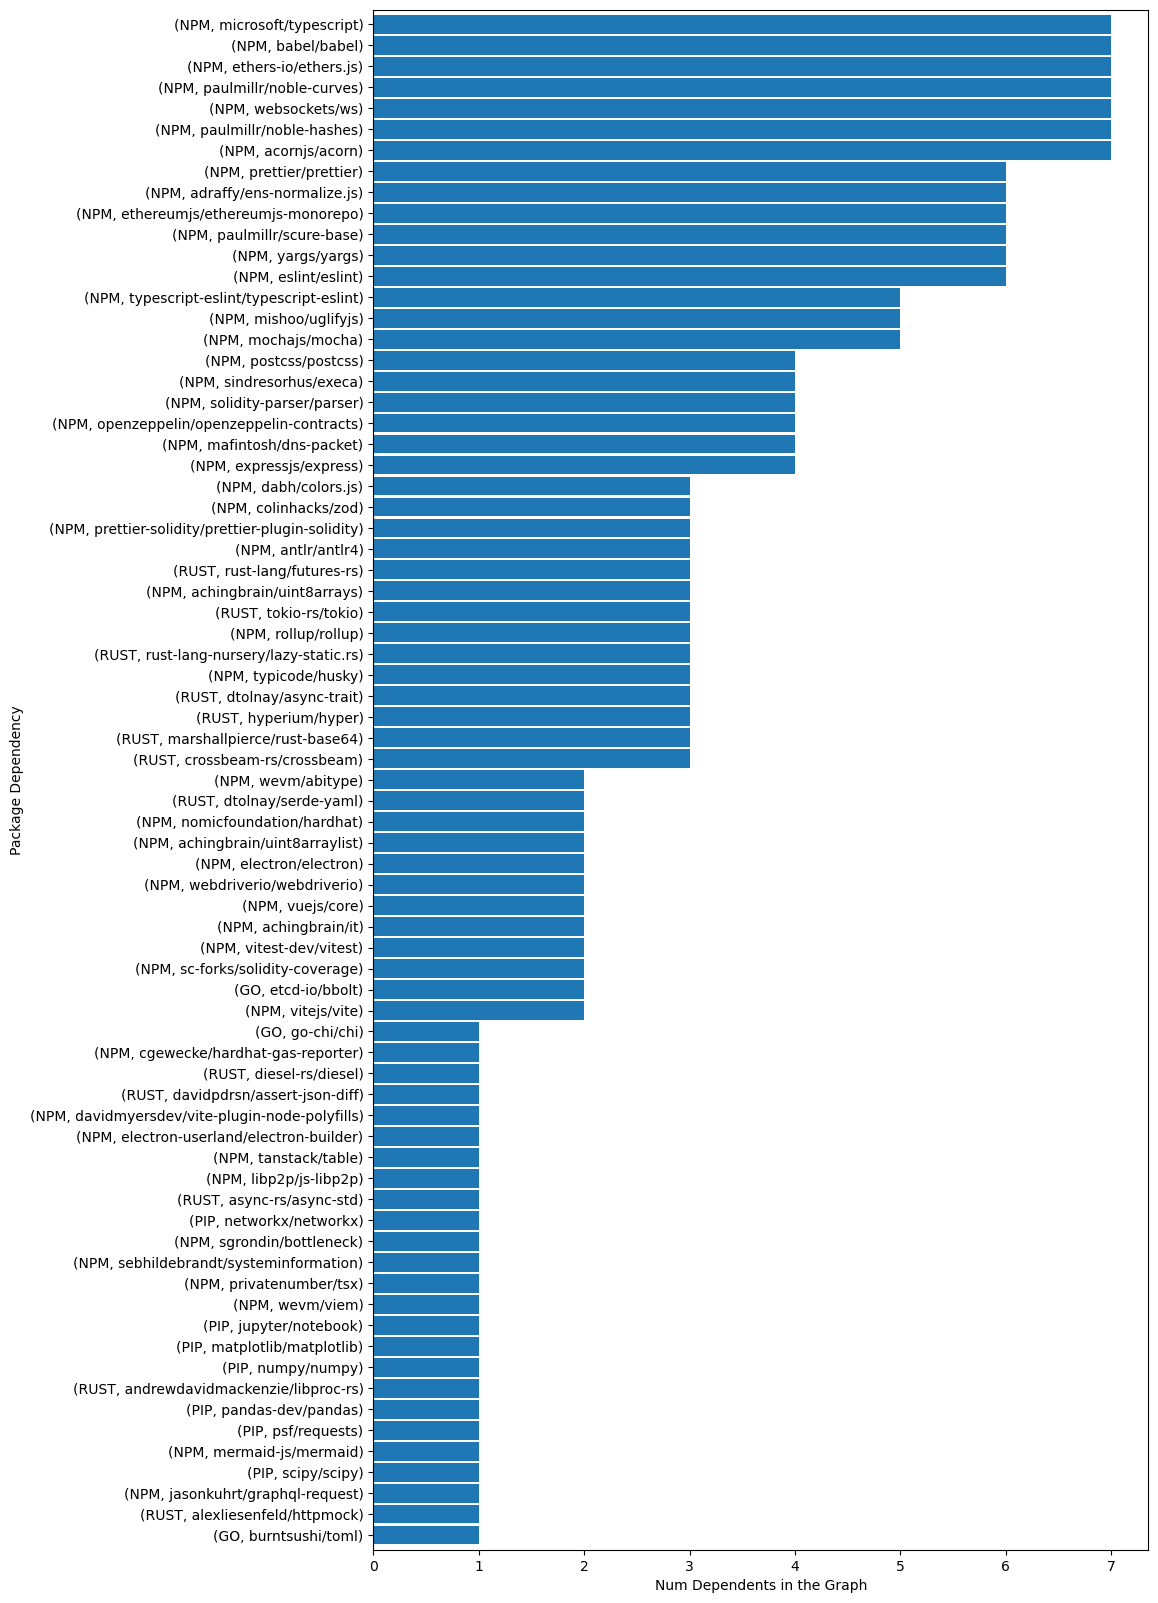

In [6]:
fig, ax = plt.subplots(figsize=(10, 20))
(
    dff_graph
    .groupby(['package_source', 'package_repo_owner_name'])['seed_repo_name']
    .nunique()
    .sort_values()
    .plot(kind='barh', width=.9)
)
ax.set_xlabel('Num Dependents in the Graph')
ax.set_ylabel('Package Dependency')